Model training, validation, and tuning

In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve, classification_report

In [2]:
# Extraindo dados
df_desen_t = pd.read_feather('../data/processed/data_t.ftr')
df_desen_s = pd.read_feather('../data/processed/data_s.ftr')
df_valid_t = pd.read_feather('../data/processed/valid_t.ftr')
df_valid_s = pd.read_feather('../data/processed/valid_s.ftr')

# Visualizando 
display(df_desen_t)
display(df_desen_s)

,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Target,Course_Animação_e_Design_Multimédia,Course_Design_de_Comunicação,Course_Enfermagem,...,Application_mode_Mudança_de_curso,Application_mode_Mudança_de_instituição/curso,"Application_mode_Portaria_n.º_533-A/99,_alínea_b2_Plano_Diferente","Application_mode_Portaria_nº_533-A/99,_item_b3_Outra_Instituição",Application_mode_Portaria_nº_612/93,Application_mode_Portaria_nº_854-B/99,Application_mode_Titulares_de_diploma_de_especialização_tecnológica,Application_mode_Titulares_de_diplomas_de_ciclo_curto,Application_mode_Titulares_de_outros_cursos_superiores,Application_mode_Transferência
0,0.677640,0.855619,0.718660,0.505317,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.066414,0.304727,-1.445110,-1.735681,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.554522,-1.898842,-1.445110,-1.735681,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.049667,0.493027,1.079288,0.575895,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.677640,0.558010,0.718660,0.596330,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,0.677640,0.127428,0.358031,0.175607,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76514,-0.066414,0.570674,0.718660,0.766123,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76515,-0.066414,0.475693,0.358031,0.319855,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76516,-1.554522,-1.898842,-1.445110,-1.735681,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Course_Animação_e_Design_Multimédia,Course_Enfermagem,Course_Engenharia_Informática,Course_Gestão_atendimento_noturno,Course_Serviço_Social,Target
0,0.677640,0.855619,0.718660,0.505317,1,1,0,0,0,0,1,0
1,-0.066414,0.304727,-1.445110,-1.735681,1,0,0,0,0,0,1,1
2,-1.554522,-1.898842,-1.445110,-1.735681,1,0,0,0,0,0,0,1
3,1.049667,0.493027,1.079288,0.575895,1,1,0,1,0,0,0,0
4,0.677640,0.558010,0.718660,0.596330,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
76513,0.677640,0.127428,0.358031,0.175607,1,1,0,0,0,0,0,0
76514,-0.066414,0.570674,0.718660,0.766123,1,0,0,0,0,0,0,0
76515,-0.066414,0.475693,0.358031,0.319855,1,0,0,0,0,0,0,0
76516,-1.554522,-1.898842,-1.445110,-1.735681,1,0,0,0,0,0,0,1


In [3]:
# Separando em features (X) e target (y)

# Base de desenvolvimento com todas variáveis transformadas (Base T)
X_t = df_desen_t.drop(columns=['Target'])
y_t = df_desen_t.Target

# Base de desenvolvimento com subconjunto de variáveis selecionadas (Base S)
X_s = df_desen_s.drop(columns=['Target'])
y_s = df_desen_s.Target

# Base de desenvolvimento com todas variáveis transformadas (Base VT)
X_vt = df_valid_t.drop(columns=['Target'])
y_vt = df_valid_t.Target

# Base de validação com subconjunto de variáveis selecionadas (Base VS)
X_vs = df_valid_s.drop(columns=['Target'])
y_vs = df_valid_s.Target

# Visualizando
display(X_s.shape)
display(X_t.shape)
display(X_vs.shape)
display(X_vt.shape)

(72692, 11)

(72692, 38)

(3826, 11)

(3826, 38)

## Base T

In [4]:
# Separando base de desenvolvimento em treino e teste
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X_t, y_t, test_size=.2, random_state=412)

display(X_t_train.shape)
display(X_t_test.shape)

(58153, 38)

(14539, 38)

In [13]:
# Criando modelo para GridSearch
log_reg = LogisticRegression(max_iter=5000)

# Definindo parâmetros a testar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga'] 
}

# Realizando GridSearch
grid_search = GridSearchCV(log_reg, param_grid, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], refit=False, verbose=3, n_jobs=-1)
grid_search.fit(X_t_train, y_t_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [53]:
results = pd.DataFrame(grid_search.cv_results_)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_accuracy,split1_test_accuracy,...,split3_test_roc_auc,split4_test_roc_auc,split5_test_roc_auc,split6_test_roc_auc,split7_test_roc_auc,split8_test_roc_auc,split9_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,0.424799,0.024635,0.026905,0.006656,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.898728,0.905949,...,0.944549,0.944618,0.945808,0.942683,0.941170,0.944235,0.939083,0.942983,0.002331,20
1,0.846390,0.082537,0.022405,0.002871,0.01,l1,saga,"{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}",0.898384,0.906293,...,0.944898,0.944953,0.945905,0.943350,0.941500,0.944466,0.939320,0.943358,0.002262,19
2,0.206747,0.049371,0.021604,0.002154,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.898728,0.905433,...,0.946483,0.946318,0.947187,0.943585,0.942670,0.946002,0.940486,0.944301,0.002531,18
3,0.744170,0.053992,0.029406,0.005005,0.01,l2,saga,"{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}",0.899072,0.905605,...,0.946703,0.946608,0.947395,0.944071,0.942941,0.946197,0.940685,0.944585,0.002488,17
4,0.636444,0.165110,0.026106,0.007122,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.899072,0.907497,...,0.947762,0.947106,0.947983,0.944912,0.943740,0.946879,0.941066,0.945192,0.002581,16


In [59]:
selected_columns = ['params', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time']
for col in results:
    if col.startswith('mean_test') or col.startswith('std_test') or col.startswith('rank_test'):
        selected_columns.append(col)

def highlight_values(s):
    if s.name == 'params': 
        return [''] * len(s)
    if s.name in ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time']:  
        is_min = s == s.min()
        return ['background-color: blue' if v else '' for v in is_min]
    if s.name.startswith(('mean_test', 'std_test')):  
        is_max = s == s.max()
        return ['background-color: blue' if v else '' for v in is_max]
    if s.name.startswith('rank_test'):  
        is_min = s == s.min()
        return ['background-color: blue' if v else '' for v in is_min]
    return [''] * len(s)  

results_highlighted = results[selected_columns].style.apply(highlight_values, subset=selected_columns[1:], axis=0)

results_highlighted

,params,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}",0.424799,0.024635,0.026905,0.006656,0.903892,0.002412,20,0.911160,0.003479,2,0.786782,0.007385,20,0.844393,0.004431,20,0.942983,0.002331,20
1,"{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}",0.846390,0.082537,0.022405,0.002871,0.904046,0.002778,19,0.909678,0.004027,4,0.788857,0.007421,18,0.844951,0.004921,19,0.943358,0.002262,19
2,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}",0.206747,0.049371,0.021604,0.002154,0.904321,0.003036,17,0.911627,0.004239,1,0.787716,0.007364,19,0.845139,0.005287,18,0.944301,0.002531,18
3,"{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}",0.744170,0.053992,0.029406,0.005005,0.904304,0.003040,18,0.910142,0.004244,3,0.789220,0.007172,17,0.845366,0.005254,17,0.944585,0.002488,17
4,"{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}",0.636444,0.165110,0.026106,0.007122,0.905250,0.002969,12,0.905032,0.004681,5,0.797884,0.006521,15,0.848076,0.004989,14,0.945192,0.002581,16
5,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",1.346798,0.279892,0.021605,0.002010,0.905078,0.002916,15,0.904596,0.004501,7,0.797780,0.006694,16,0.847824,0.004941,16,0.945243,0.002546,15
6,"{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}",0.239254,0.023043,0.025006,0.008224,0.905353,0.002863,1,0.904783,0.004633,6,0.798507,0.006457,13,0.848317,0.004818,11,0.945314,0.002527,14
7,"{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}",1.649974,0.148953,0.032908,0.010590,0.905061,0.003063,16,0.903976,0.005189,8,0.798403,0.006300,14,0.847905,0.005063,15,0.945347,0.002508,13
8,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",1.694281,0.292935,0.026007,0.006018,0.905267,0.003010,10,0.903523,0.005127,9,0.799596,0.006300,10,0.848377,0.004981,10,0.945377,0.002491,4
9,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",8.319571,2.877394,0.022105,0.003331,0.905267,0.003041,11,0.903476,0.005232,10,0.799648,0.006248,9,0.848386,0.005015,9,0.945380,0.002489,3


In [5]:
# Criando modelo com penalização ElasticNet
logistic_t = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, random_state=412, l1_ratio=0.5, C=1.0)

# Ajustando modelo aos dados de treino
logistic_t.fit(X_t_train, y_t_train)

# Criando previsões
y_t_pred = logistic_t.predict(X_t_test)

# Avaliando modelo
accuracy_score(y_t_test, y_t_pred)

0.9075589792970631

In [6]:

# Definindo funções para avaliar o modelo nas bases de treino e teste 
def avaliar_modelo(model: LogisticRegression , X_train: pd.DataFrame, y_train: pd.Series, X_test: pd.DataFrame, y_test: pd.Series) -> None:
    '''
    Função para conduzir a avaliação do modelo criado e plotar as métricas do modelo.

    Parâmetros:
    - model: recebe o modelo de regressão logística ajustado.
    - X_train: recebe o DataFrame do Pandas com os dados de treino das variáveis independentes.
    - y_train: recebe o Series do Pandas com os dados de treino da variável resposta.
    - X_test: recebe o DataFrame do Pandas com os dados de teste das variáveis independentes.
    - y_test: recebe o Series do Pandas com os dados de teste da variável resposta.
    '''
    # Criando previsão de classes com a base de treino
    y_pred_train = model.predict(X_train)
    
    # Criando previsão de probabilidades com base de treino
    y_probs_train = model.predict_proba(X_train)
    
    # Calculando métricas na base de treinamento
    acc_train = accuracy_score(y_train, y_pred_train)
    auc_train = roc_auc_score(y_train, y_pred_train)
    gini_train = 2 * auc_train - 1
    fpr, tpr, _ = roc_curve(y_train, y_probs_train[:, 1])
    ks_train = max(tpr - fpr)
    cls_report_train = classification_report(y_train, y_pred_train)
    
    # Criando previsão de classes com a base de teste
    y_pred_test = model.predict(X_test)
    
    # Criando previsão de probabilidades com base de teste
    y_probs_test = model.predict_proba(X_test)
    
    # Calculando métricas na base de teste
    acc_test = accuracy_score(y_test, y_pred_test)
    auc_test = roc_auc_score(y_test, y_pred_test)
    gini_test = 2 * auc_test - 1
    fpr, tpr, _ = roc_curve(y_test, y_probs_test[:, 1])
    ks_test = max(tpr - fpr)
    cls_report_test = classification_report(y_test, y_pred_test)
    
    # Visualizando métricas na base de treino
    print('='*75)
    print('Métricas do modelo na base de treino'.center(75))
    print('='*75)
    print(f'Acurácia do modelo na base de treino: {acc_train:.2%}')
    print(f'AUC do modelo na base de treino: {auc_train:.2%}')
    print(f'Coeficiente de Gini do modelo na base de treino: {gini_train:.2%}')
    print(f'KS do modelo na base de treino: {ks_train:.4f}')
    print(cls_report_train)
    
    # Criando e plotando matrix de confusão na base de treino
    cm = confusion_matrix(y_train, y_pred_train)
    cm_disp = ConfusionMatrixDisplay(cm)
    cm_disp.plot()
    plt.show()
    
    # Visualizando métricas na base de teste
    print('='*75)
    print('Métricas do modelo na base de teste'.center(75))
    print('='*75)
    print(f'Acurácia do modelo na base de teste: {acc_test:.2%}')
    print(f'AUC do modelo na base de teste: {auc_test:.2%}')
    print(f'Coeficiente de Gini do modelo na base de teste: {gini_test:.2%}')
    print(f'KS do modelo na base de teste: {ks_test:.4f}')
    print(cls_report_test)
    
    # Criando e plotando matrix de confusão na base de teste
    cm = confusion_matrix(y_test, y_pred_test)
    cm_disp = ConfusionMatrixDisplay(cm)
    cm_disp.plot()
    plt.show()

                    Métricas do modelo na base de treino                   
Acurácia do modelo na base de treino: 90.53%
AUC do modelo na base de treino: 87.86%
Coeficiente de Gini do modelo na base de treino: 75.72%
KS do modelo na base de treino: 0.7755
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     38877
           1       0.90      0.80      0.85     19276

    accuracy                           0.91     58153
   macro avg       0.90      0.88      0.89     58153
weighted avg       0.91      0.91      0.90     58153



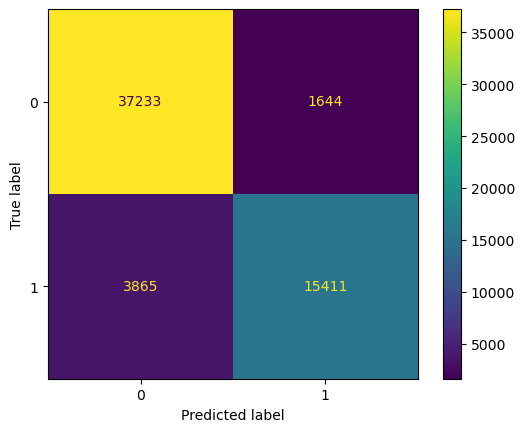

                    Métricas do modelo na base de teste                    
Acurácia do modelo na base de teste: 90.76%
AUC do modelo na base de teste: 88.01%
Coeficiente de Gini do modelo na base de teste: 76.03%
KS do modelo na base de teste: 0.7856
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      9810
           1       0.90      0.80      0.85      4729

    accuracy                           0.91     14539
   macro avg       0.91      0.88      0.89     14539
weighted avg       0.91      0.91      0.91     14539



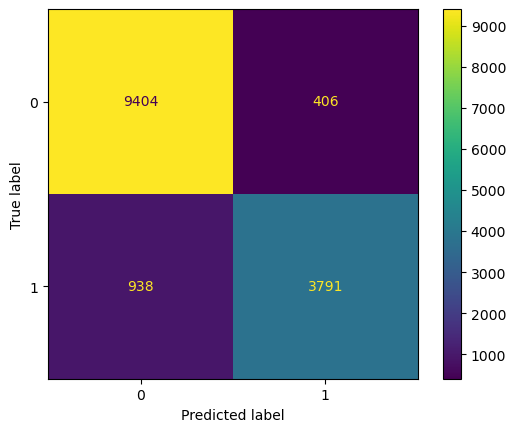

In [7]:
avaliar_modelo(logistic_t, X_t_train, y_t_train, X_t_test, y_t_test)

## Base S